In [37]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

df

,A,B,C,D
0,foo,one,1.072481,-0.809234
1,bar,one,0.428977,0.391376
2,foo,two,1.086939,0.697260
3,bar,three,0.501046,0.968090
4,foo,two,0.584213,-1.830572
5,bar,two,0.237021,0.284602
6,foo,one,0.001508,-0.413257
7,foo,three,0.325601,-0.336446


On a DataFrame, we obtain a GroupBy object by calling **groupby()**. This method returns a pandas.api.typing.DataFrameGroupBy instance. We could naturally group by either the A or B columns, or both.

Collectively we refer to the grouping objects as the **keys**

In [39]:
grouped = df.groupby("A")  # df.groupby('A') is just syntactic sugar for df.groupby(df['A']).
grouped

In [40]:
df2 = df.set_index(["A", "B"])  # set multi index
df2

C         D
A   B                        
foo one    1.072481 -0.809234
bar one    0.428977  0.391376
foo two    1.086939  0.697260
bar three  0.501046  0.968090
foo two    0.584213 -1.830572
bar two    0.237021  0.284602
foo one    0.001508 -0.413257
    three  0.325601 -0.336446

In [41]:
df2.loc["foo"].loc["one"]  # first index for A, then index for B

,C,D
B,,
one,1.072481,-0.809234
one,0.001508,-0.413257


In [42]:
grouped = df2.groupby(level=df2.index.names.difference(["B"]))  # Initialize a groupby object
grouped.sum()

,C,D
A,,
bar,1.167044,1.644068
foo,3.070742,-2.692248


In [43]:
C = np.arange(1, 7, dtype=float)
C[[3, 5]] = np.nan
df = pd.DataFrame({
    "A" : [1, 1, 1, 2, 2, 2],
    "B" : [1, 1, 2, 2, 1, 1],
    "C": C,
})
df

,A,B,C
0,1,1,1.0
1,1,1,2.0
2,1,2,3.0
3,2,2,NaN
4,2,1,5.0
5,2,1,NaN


In [44]:
gbB = df.groupby("B")
gbB

In [45]:
gbB.get_group(2)  # Filters the rows such that only the rows where B = 2 is shown.

,A,B,C
2,1,2,3.0
3,2,2,NaN


In [46]:
gbB.get_group(1)  # Filters the rows such that only the rows where B = 1 is shown. Notice the groupby object keeps the original indexes.

,A,B,C
0,1,1,1.0
1,1,1,2.0
4,2,1,5.0
5,2,1,NaN


In [47]:
gbB.sum()  # Grouped by the different values in B, each group is summed. There are 2 groups: B = 1 group and B = 2 group. Notice B column is now index:

,A,C
B,,
1,6,8.0
2,3,3.0


In [48]:
# let's get back to original df
df

,A,B,C
0,1,1,1.0
1,1,1,2.0
2,1,2,3.0
3,2,2,NaN
4,2,1,5.0
5,2,1,NaN


In [49]:
gbA = df.groupby("A")
gbA.sum()  # Notice in the A=1 group, sum of C values is as we expect.
           # However in the A=2 group, NaN values are just dropped and only 5.0 is summed.

,B,C
A,,
1,4,6.0
2,4,5.0


In [50]:
gbA.count()  # count method also shows the same thing.

,B,C
A,,
1,3,3
2,3,1


In [51]:
# method 1
gbA.agg(np.sum)

/tmp/ipykernel_4963/4273263240.py:2: FutureWarning: The provided callable <function sum at 0x7fdde0097c70> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  gbA.agg(np.sum)


,B,C
A,,
1,4,6.0
2,4,5.0


In [52]:
# method 2
gbA.aggregate(sum)

/tmp/ipykernel_4963/2716902714.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  gbA.aggregate(sum)


,B,C
A,,
1,4,6.0
2,4,5.0


In [53]:
# method 3
gbA.corr()  # A correlation matrix is shown where values of B and C are grouped into 2 different groups (A=1 and A=2)
            # And then 2 separate correlation matrixes are shown with values of A as indexes
            # Notice this is a multi-index dataframe.

B         C
A                      
1 B  1.000000  0.866025
  C  0.866025  1.000000
2 B  1.000000       NaN
  C       NaN       NaN

In [54]:
type(gbA.corr())  # Notice after using a method on groupby object, the type is DataFrame.

pandas.core.frame.DataFrame

In [55]:
corrdf = gbA.corr()
corrdf.iloc[1, :]  # Second row and all columns. Notice the B and C in the index is not shown.

B    0.866025
C    1.000000
Name: (1, C), dtype: float64

In [56]:
corrdf.iloc[:, 0]  # All rows and first column.

A   
1  B    1.000000
   C    0.866025
2  B    1.000000
   C         NaN
Name: B, dtype: float64

In [57]:
corrdf.loc[:, "B"]  # same as above, only with .loc() method.

A   
1  B    1.000000
   C    0.866025
2  B    1.000000
   C         NaN
Name: B, dtype: float64

In [58]:
# Because this is a multi-index dataframe, we can access individual elements like this:
corrdf.loc[1, :]["B"]  # Select the rows where A=1. Then, inside that select the rows where the 2nd index is "B"

B    1.000000
C    0.866025
Name: B, dtype: float64

In [59]:
# Now group by both A and B
gbAB = df.groupby(["A", "B"])

The index of the combined DataFrame will be the group identifiers, with one index level per group key.

In [60]:
gbAB.count()

C
A B   
1 1  2
  2  1
2 1  1
  2  0

In [61]:
df.isnull()

,A,B,C
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,True
4,False,False,False
5,False,False,True


In [62]:
gbC = df.isnull().groupby("C")
gbC.sum()  # False is equal to 0, True is equal to 1 in numeric operations.

,A,B
C,,
False,0,0
True,0,0


In [63]:
def num_missing(df):
    "Return the number of missing items in each COLUMN of df"
    return df.isnull().sum()

In [64]:
num_missing(df)

A    0
B    0
C    2
dtype: int64

In [65]:
gbA.agg(num_missing)  # now the dataframe is grouped into 2 groups depending on the value of A column.

,B,C
A,,
1,0,0
2,0,2


The key to keep in mind is that the function we pass to agg should take in a DataFrame (or Series) and return a Series (or single value) with one item per column in the original DataFrame.

* When the function is called, the data for each group will be passed to our function as a DataFrame (or Series).

In [66]:
def smallest_by_b(df):
    return df.nsmallest(2, "B")

In [67]:
gbA.apply(smallest_by_b)

A  B    C
A             
1 0  1  1  1.0
  1  1  1  2.0
2 4  2  1  5.0
  5  2  1  NaN

Notice that:

* The first (outer) index is the group level
* The second (inner) index is the original index



In [68]:
df2 = df.copy()
df2

,A,B,C
0,1,1,1.0
1,1,1,2.0
2,1,2,3.0
3,2,2,NaN
4,2,1,5.0
5,2,1,NaN


In [69]:
df.shape  # shape of the dataframe

(6, 3)

In [70]:
import datetime

In [71]:
df2["Date"] = pd.date_range(start=datetime.datetime.today().strftime("%m/%d/%Y"), freq="BQ", periods=df.shape[0])
df2

,A,B,C,Date
0,1,1,1.0,2023-12-29
1,1,1,2.0,2024-03-29
2,1,2,3.0,2024-06-28
3,2,2,NaN,2024-09-30
4,2,1,5.0,2024-12-31
5,2,1,NaN,2025-03-31


In [72]:
df2.dtypes  # "Date" column is datetime64 dtype.

A                int64
B                int64
C              float64
Date    datetime64[ns]
dtype: object

In [73]:
df2 = df2.set_index("A")
df2

,B,C,Date
A,,,
1,1,1.0,2023-12-29
1,1,2.0,2024-03-29
1,2,3.0,2024-06-28
2,2,NaN,2024-09-30
2,1,5.0,2024-12-31
2,1,NaN,2025-03-31


In [75]:
df2.index  # index is now int64 dtype

Index([1, 1, 1, 2, 2, 2], dtype='int64', name='A')

In [76]:
# Group by year, with pd.Grouper()
df2.groupby(pd.Grouper(key="Date", freq="A")).count()

,B,C
Date,,
2023-12-31,1,1
2024-12-31,4,3
2025-12-31,1,0


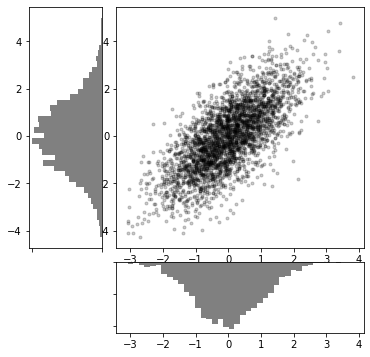

In [77]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
rng = np.random.default_rng(1701)
x, y = rng.multivariate_normal(mean, cov, 3000).T

# Set up the axes with GridSpec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# Scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# Histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()